#### Random Forest Regressor Practical Practice

In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [105]:
carseats=pd.read_csv("dataset_car_seats.csv")
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [106]:
carseats.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
# carseats.isna().sum()
# carseats.dropna()
# carseats.isnull().sum()

In [11]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [14]:
carseats['ShelveLoc'].dtype,carseats['Urban'].dtype,carseats['US'].dtype

(dtype('O'), dtype('O'), dtype('O'))

In [107]:
carseats['ShelveLoc']=LabelEncoder().fit_transform(carseats['ShelveLoc'])
carseats['Urban']=LabelEncoder().fit_transform(carseats['Urban'])
carseats['US']=LabelEncoder().fit_transform(carseats['US'])
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,0,42,17,1,1
1,1,11.22,111,48,16,260,83,1,65,10,1,1
2,2,10.06,113,35,10,269,80,2,59,12,1,1
3,3,7.40,117,100,4,466,97,2,55,14,1,1
4,4,4.15,141,64,3,340,128,0,38,13,1,0


In [108]:
carseats.drop('Unnamed: 0',axis=1, inplace=True)

In [30]:
X = carseats.drop('Sales', axis=1)
y=carseats['Sales']
X.shape, y.shape

((400, 10), (400,))

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

Trying with Usual Random Forest Regressor Model 

In [35]:
rfr=RandomForestRegressor(random_state=42)
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
clf_rfr=GridSearchCV(rfr, {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]},cv=kfold,
                    scoring='neg_mean_squared_error',n_jobs=-1)

clf_rfr.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200, 1300,
                                          1400, 1500]},
             scoring='neg_mean_squared_error')

In [45]:
df_rfr=pd.DataFrame(clf_rfr.cv_results_)
df_rfr=df_rfr[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score');df_rfr

,params,mean_test_score
7,{'n_estimators': 800},-2.798161
14,{'n_estimators': 1500},-2.801186
11,{'n_estimators': 1200},-2.801272
13,{'n_estimators': 1400},-2.801351
12,{'n_estimators': 1300},-2.804560
5,{'n_estimators': 600},-2.805411
9,{'n_estimators': 1000},-2.805766
6,{'n_estimators': 700},-2.806252
10,{'n_estimators': 1100},-2.807373
8,{'n_estimators': 900},-2.807605


In [43]:
clf_rfr.best_params_,clf_rfr.best_score_

({'n_estimators': 800}, -2.7981613301425874)

In [46]:
rfr=RandomForestRegressor(n_estimators=800,random_state=42)
rfr.fit(x_train,y_train)

y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)

In [51]:
print(f"Train Set MSE: {mean_squared_error(y_train,y_pred_train):.2f}")
print(f"Test Set MSE: {mean_squared_error(y_test,y_pred_test):.2f}\n")

print(f"Train Set R2: {r2_score(y_train,y_pred_train):.2f}")
print(f"Test Set R2: {r2_score(y_test,y_pred_test):.2f}")

Train Set MSE: 0.34
Test Set MSE: 2.53

Train Set R2: 0.96
Test Set R2: 0.65


**Now Doing the thing again but with feature selection enabled**

In [56]:
n_features=x_train.shape[1]
int(np.ceil(n_features/3))     # We are usinng a random subset of features at each step for node spliting, core point of randomness in Random Forest.
                               # For a regression problem, number of features at each split should be p/3 (p = total number of predictors)

4

In [57]:
rf=RandomForestRegressor(max_features=int(np.ceil(n_features/3)),random_state=42)
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
clf_rf=GridSearchCV(rf, {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]},cv=kfold,
                    scoring='neg_mean_squared_error',n_jobs=-1)

clf_rf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(max_features=4, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200, 1300,
                                          1400, 1500]},
             scoring='neg_mean_squared_error')

In [61]:
df_rf=pd.DataFrame(clf_rf.cv_results_)
df_rf=df_rf[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score');df_rf

,params,mean_test_score
14,{'n_estimators': 1500},-3.008794
13,{'n_estimators': 1400},-3.010640
12,{'n_estimators': 1300},-3.011216
10,{'n_estimators': 1100},-3.013827
7,{'n_estimators': 800},-3.014443
11,{'n_estimators': 1200},-3.016447
9,{'n_estimators': 1000},-3.019051
8,{'n_estimators': 900},-3.024126
5,{'n_estimators': 600},-3.024297
6,{'n_estimators': 700},-3.025966


In [63]:
clf_rf.best_params_,clf_rf.best_score_

({'n_estimators': 1500}, -3.0087937639205515)

In [65]:
rf=RandomForestRegressor(max_features=int(np.ceil(n_features/3)),n_estimators=1500,random_state=42)
rf.fit(x_train,y_train)

y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [66]:
print(f"Train Set MSE: {mean_squared_error(y_train,y_pred_train):.2f}")
print(f"Test Set MSE: {mean_squared_error(y_test,y_pred_test):.2f}\n")

print(f"Train Set R2: {r2_score(y_train,y_pred_train):.2f}")
print(f"Test Set R2: {r2_score(y_test,y_pred_test):.2f}")

Train Set MSE: 0.37
Test Set MSE: 2.79

Train Set R2: 0.95
Test Set R2: 0.61


In [72]:
rf.feature_names_in_,rf.feature_importances_

(array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
        'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object),
 array([0.09923213, 0.0792455 , 0.08048925, 0.06073614, 0.2675316 ,
        0.22214017, 0.12866409, 0.04229747, 0.00740731, 0.01225635]))

In [85]:
df_feature=pd.DataFrame(data=rf.feature_importances_,index=rf.feature_names_in_,columns=['Feature Importance']).sort_values(ascending=False,by='Feature Importance')
df_feature

,Feature Importance
Price,0.267532
ShelveLoc,0.222140
Age,0.128664
CompPrice,0.099232
Advertising,0.080489
Income,0.079245
Population,0.060736
Education,0.042297
US,0.012256
Urban,0.007407


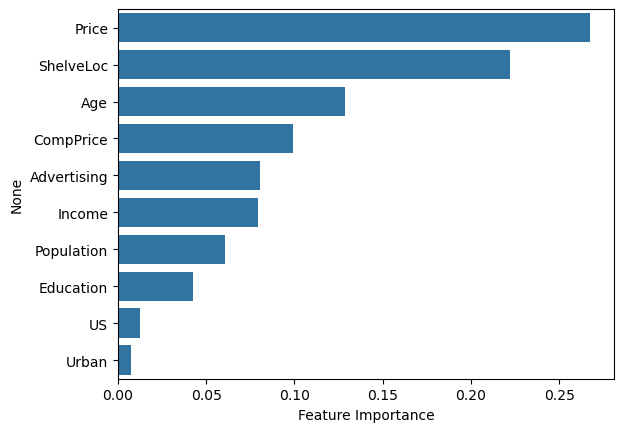

In [89]:
sns.barplot(x=df_feature['Feature Importance'], y=df_feature.index)
plt.show()

In [91]:
# Measures drop in performance (increase in MSE) when a feature has its rows shuffled so that it becomes meaningless to
# the target variable.

from sklearn.inspection import permutation_importance
result = permutation_importance(rf,
                                x_train, y_train,
                                scoring = 'neg_mean_squared_error',
                                n_repeats = 10,
                                random_state = 0)
result.importances_mean

array([0.9479854 , 0.56699855, 0.89190457, 0.31232099, 4.4058449 ,
       3.88975761, 1.46691116, 0.24579694, 0.03640069, 0.09170668])

In [92]:
df1 = pd.DataFrame({'Features': x_train.columns, 'Feature_Importance':result.importances_mean})
df1 = df1.sort_values(ascending=False, by = 'Feature_Importance')
df1.head()

,Features,Feature_Importance
4,Price,4.405845
5,ShelveLoc,3.889758
6,Age,1.466911
0,CompPrice,0.947985
2,Advertising,0.891905


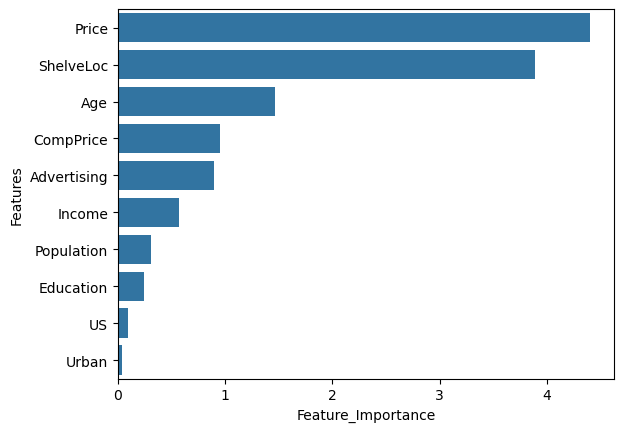

In [93]:
sns.barplot(x = df1['Feature_Importance'], y = df1['Features'])
plt.show()

In [95]:
# OOB

oob_bag = RandomForestRegressor(n_estimators=1500, max_features=int(np.ceil(n_features/3)), random_state=42, oob_score = True)
oob_bag.fit(x_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=1500, oob_score=True,
                      random_state=42)

In [96]:
# oob r2 score
oob_bag.oob_score_

0.6667462764251351

In [97]:
# oob mse
y_pred_oob = oob_bag.oob_prediction_
mean_squared_error(y_train, y_pred_oob)

2.703052582055034

#### RandomForestClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [109]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [110]:
X=carseats.drop("Urban",axis=1)
y=carseats["Urban"]

X.shape, y.shape

((400, 10), (400,))

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

In [112]:
n_features=x_train.shape[1]
int(np.ceil(n_features/3))     # We are usinng a random subset of features at each step for node spliting, core point of randomness in Random Forest.
                               # For a regression problem, number of features at each split should be p/3 (p = total number of predictors)

4

In [120]:
rf=RandomForestClassifier(max_features=int(np.ceil(n_features/3)),random_state=42)
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
clf_rf=GridSearchCV(rf, {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]},cv=kfold,
                    scoring='accuracy',n_jobs=1)

clf_rf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_features=4, random_state=42),
             n_jobs=1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200, 1300,
                                          1400, 1500]},
             scoring='accuracy')

In [121]:
df_rf=pd.DataFrame(clf_rf.cv_results_)
df_rf=df_rf[['params','mean_test_score']].sort_values(ascending=False,by='mean_test_score');df_rf.head()

,params,mean_test_score
5,{'n_estimators': 600},0.681250
6,{'n_estimators': 700},0.681250
3,{'n_estimators': 400},0.678125
4,{'n_estimators': 500},0.678125
7,{'n_estimators': 800},0.678125


In [122]:
clf_rf.best_params_,clf_rf.best_score_

({'n_estimators': 600}, 0.68125)

In [127]:
rf=RandomForestClassifier(max_features=int(np.ceil(n_features/3)),n_estimators=600,random_state=42)
rf.fit(x_train,y_train)

y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [128]:
print(f"Train Set Accuracy: {accuracy_score(y_train,y_pred_train):.2f}")
print(f"Test Set Accuracy: {accuracy_score(y_test,y_pred_test):.2f}")

Train Set Accuracy: 1.00
Test Set Accuracy: 0.66


In [129]:
rf.feature_names_in_,rf.feature_importances_

(array(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
        'Price', 'ShelveLoc', 'Age', 'Education', 'US'], dtype=object),
 array([0.12808054, 0.11975877, 0.17149905, 0.0677268 , 0.14246641,
        0.11573631, 0.02700749, 0.13647204, 0.07703986, 0.01421275]))

In [130]:
df_feature=pd.DataFrame(data=rf.feature_importances_,index=rf.feature_names_in_,columns=['Feature Importance']).sort_values(ascending=False,by='Feature Importance')
df_feature.head()

,Feature Importance
Income,0.171499
Population,0.142466
Age,0.136472
Sales,0.128081
CompPrice,0.119759


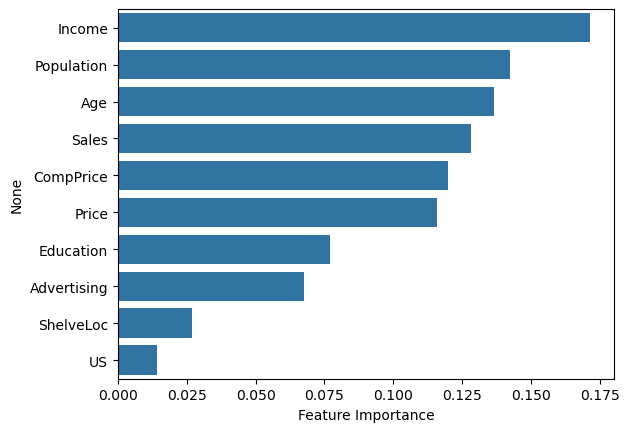

In [131]:
sns.barplot(x=df_feature['Feature Importance'], y=df_feature.index)
plt.show()

In [133]:
# Measures drop in performance (increase in MSE) when a feature has its rows shuffled so that it becomes meaningless to
# the target variable.

from sklearn.inspection import permutation_importance
result = permutation_importance(rf,
                                x_train, y_train,
                                scoring = 'accuracy',
                                n_repeats = 10,
                                random_state = 0)
result.importances_mean

array([0.026875 , 0.028125 , 0.0859375, 0.01875  , 0.045    , 0.0296875,
       0.       , 0.07875  , 0.02     , 0.       ])

In [134]:
df1 = pd.DataFrame({'Features': x_train.columns, 'Feature_Importance':result.importances_mean})
df1 = df1.sort_values(ascending=False, by = 'Feature_Importance')
df1.head()

,Features,Feature_Importance
2,Income,0.085937
7,Age,0.078750
4,Population,0.045000
5,Price,0.029687
1,CompPrice,0.028125


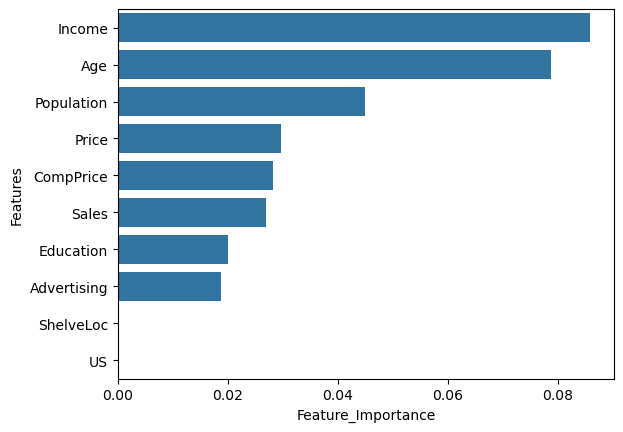

In [136]:
sns.barplot(x = df1['Feature_Importance'], y = df1['Features'])
plt.show()

In [137]:
# OOB

oob_bag = RandomForestClassifier(n_estimators=600, max_features=int(np.ceil(n_features/3)), random_state=42, oob_score = True)
oob_bag.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=600, oob_score=True,
                       random_state=42)

In [138]:
# oob accuracy score
oob_bag.oob_score_

0.68125

In [140]:
# oob mse
y_pred_oob = oob_bag.oob_prediction_
accuracy_score(y_train, y_pred_oob)

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction_'